# **<H1>MENTAL HEALTH PREDICTION<H1>**

**<h3>Jaswanth Kumar</h3>**
**<h3>AP22110010489<h3>**

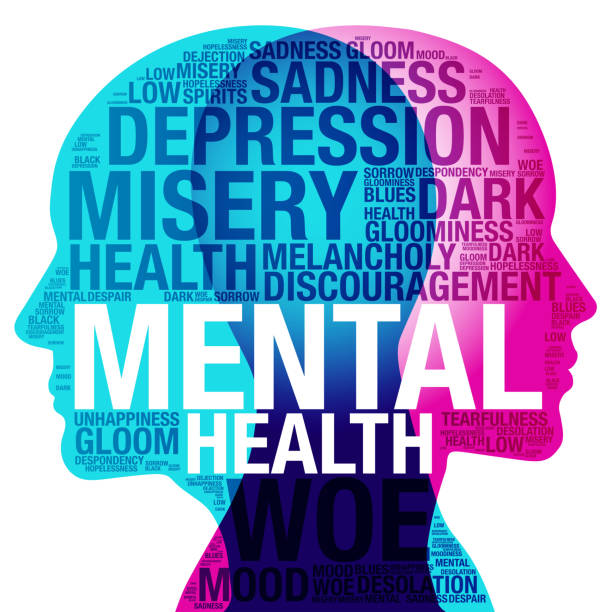

**<h1>Problem Definition</h1>**
**<h4>The Mental Health Prediction project aims to develop a model that assesses an <b>individual's mental stability</b> and <b>predicts whether they require mental health support</b>. The model evaluates various features, such as occupation, stress levels, coping mechanisms, and mental health history, to identify patterns or predictors of potential mental health issues. The goal is to facilitate early intervention by determining if an individual is at risk of mental health challenges. Specifically, the model focuses on students and professionals, predicting whether they need care or not based on their responses and behavioral indicators. This approach aims to identify those who may need timely mental health support to prevent further complications.</h4>**

**<h1>Why This Problem</h1>**
<h4>Mental health issues are increasingly prevalent, especially among students and professionals who face academic, career, and social pressures. These challenges often lead to stress, anxiety, and mood fluctuations, yet many individuals hesitate to seek help due to stigma or a lack of awareness. If left unaddressed, these issues can escalate into more severe conditions, such as depression or burnout.</h4>

<h4>Early identification of mental health concerns can significantly improve outcomes by providing timely support and reducing stigma. Mood swings, stress, and behavioral changes are early indicators that can be predicted through data-driven insights. This project leverages key features like occupation, stress levels, coping mechanisms, and mental health history to predict whether an individual needs mental health care.</h4>

<h4>By focusing on students and professionals, the project aims to provide early intervention, improve well-being, and prevent the escalation of mental health issues, ensuring timely support for those in need.</h4>

**<h1>Approach</h1>**
1.   Data Loading & Cleaning


*   Load the dataset and conduct preliminary data analysis to understand its structure.
*   Clean missing values by dropping rows with significant null values in key features.


2.   Data Visualization:

*   Plot bar charts for categorical variables, such as 'Country', to understand data distribution.
*   Plotting the Graphs of different Features and their Frequency
*   Generate value counts for each column to assess the prevalence of each feature value.


3. Encoding Categorical Data:


*   Apply label encoding to convert categorical values to numeric, which is necessary for model training.

4. Feature Selection:

*   Use correlation analysis and feature importance techniques to identify significant predictors of the target variable, care_options.
*  Since correlation is low across features, a scatter plot and class-wise heatmap analysis is conducted for better insight.  

5. Model Training:


*   Train multiple models (Decision Tree, Gaussian Naive Bayes, Random Forest, and K-Nearest Neighbors) using selected features.
*   Evaluate each model based on accuracy, precision, recall, and F1 score to determine the best-performing model.

6. Observation & Iteration:
*   Due to low initial accuracy (~46.49%), feature extraction is revisited
to improve model performance.
*   We have considered feature extraction from the given data and performed corelation cofactor to find which models are the best suiting features and then train the model and get more accuracy.
*   Finally take input from the user and predict whether they need care or not.


</h2>

**<h1>Data Loading and Cleaning<h1>**
**<h3>a. Mounting the Drive<h3>**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**<h3>b. Pre Install this Library to use them for data processing, analysis, modeling, and visualization.<h1>**

In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder


**<h3>c. Reading the Dataset<h1>**

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Mental_Health_Prediction_ML/Mental Health Dataset.csv');
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


**<h3>d. Visualizing the Dataset shape.<h1>**

In [7]:
df.shape

(292364, 17)

**<h3>e. Describing the Dataset.<h1>**

In [8]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


**<h3>f. Display a concise summary of a DataFrame.<h1>**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

**<h3>g. Check for missing or NULL values in the DataFrame<h1>**

In [10]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


**I have observed that there are missing values in self_employed so we have to clean it**


**As I have more data ,I am just going to remove the feilds which have NULL values in self_employed**

In [11]:
df = df.dropna(subset=['self_employed'])
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


**I am checking the sum if there are still any missing or NULL values.**

In [12]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


**All the missing values are cleaned now**

In [13]:
df.shape

(287162, 17)

**<h1>Data Visualization:<h1>**
**<h3>a. Plot bar charts for categorical variables, such as 'Country', to understand data distribution.<h1>**


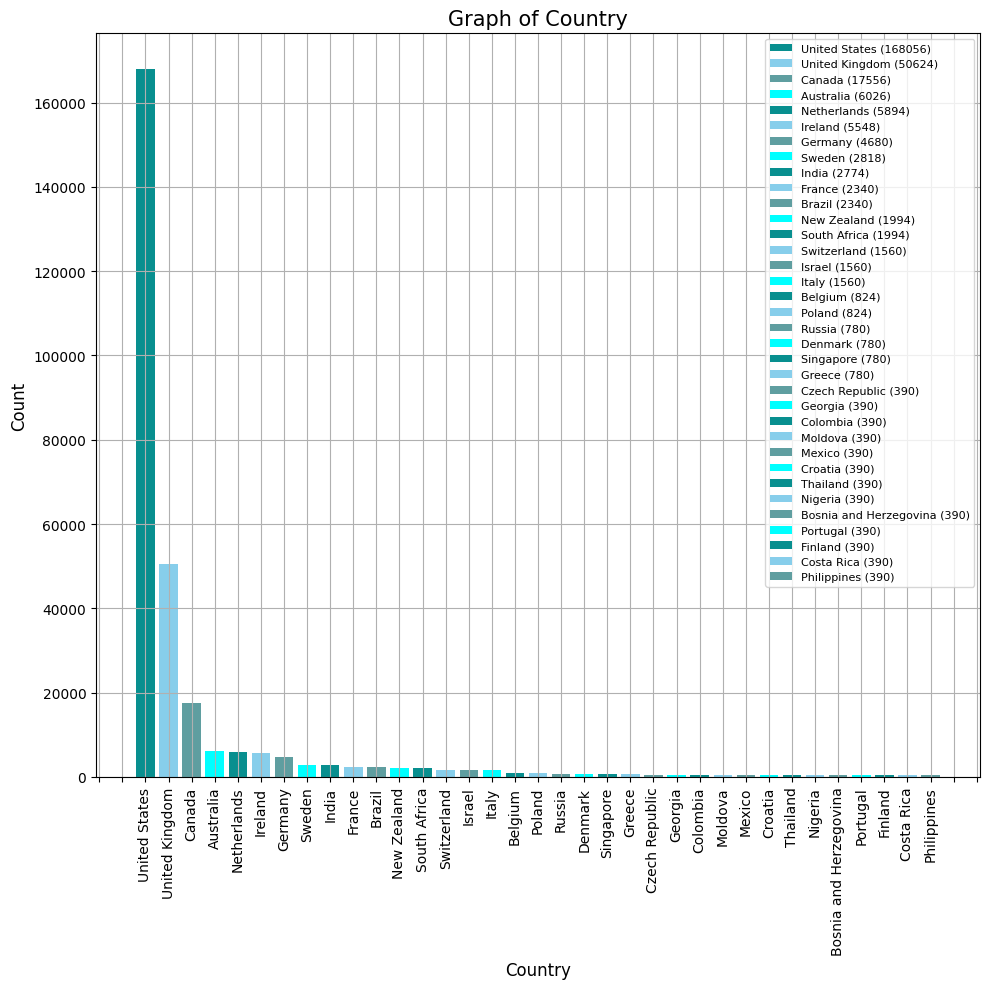

In [14]:
specific_column = 'Country'

# Define the desired colors
legend_colors = ['#088F8F','#87CEEB',  '#5F9EA0', '#00FFFF']

plt.figure(figsize=(10, 10))

value_counts = df[specific_column].value_counts()
unique_values = value_counts.index

bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
plt.title(f'Graph of {specific_column}', fontsize=15)
plt.xlabel(specific_column, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
plt.legend(bars, legend_labels, loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


**<h3>b. Generating bar charts for each column in the DataFrame df (except the first column). It shows the distribution of values for each column as a separate plot.<h1>**

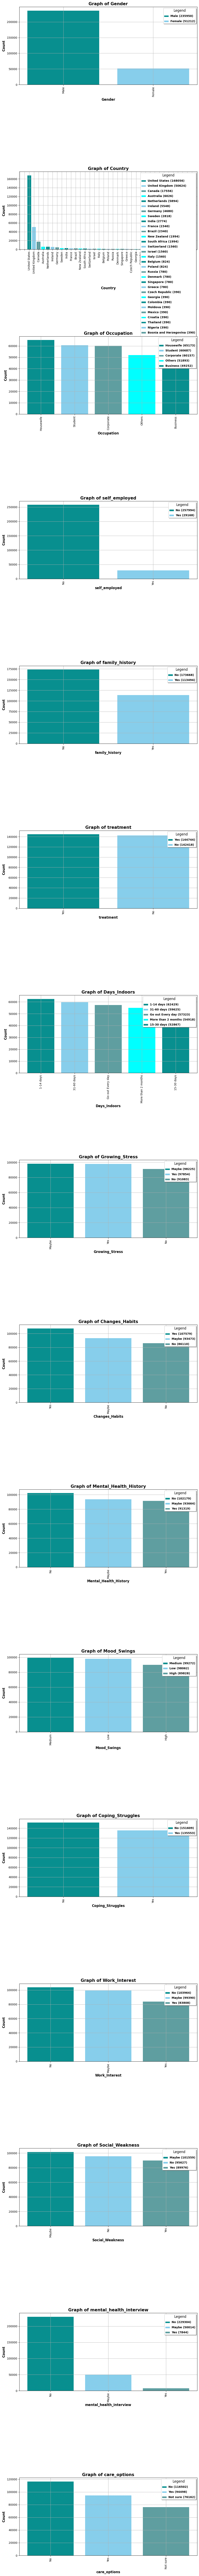

In [15]:
legend_colors = ['#088F8F', '#87CEEB', '#5F9EA0', '#00FFFF']  # Specify your desired legend colors

plt.figure(figsize=(10, 8* (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    unique_values = value_counts.index

    plt.subplot(len(df.columns) - 1, 1, i)
    bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
    plt.title(f'Graph of {column}', fontsize=15, fontweight='bold')  # Bold title
    plt.xlabel(column, fontsize=12, fontweight='bold')  # Bold column name
    plt.ylabel('Count', fontsize=12, fontweight='bold')  # Bold count
    plt.xticks(rotation=90, ha='center')
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

    legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    legend_labels_bold = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    plt.legend(bars, legend_labels, loc='upper right', fontsize=8, title='Legend', title_fontsize='12', labelspacing=1, fancybox=True, framealpha=1, shadow=True)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10', fontweight='bold')

plt.tight_layout()
plt.show()


**<h3>c. Printing each column's name along with the frequency of each unique value within that column in the DataFrame<h1>**

In [16]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Timestamp
Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 12:39    1604
8/27/2014 16:21    1604
                   ... 
8/27/2014 23:54     390
8/27/2014 23:30     390
8/27/2014 23:14     390
8/27/2014 23:10     390
2/1/2016 23:04      390
Name: count, Length: 574, dtype: int64

Column: Gender
Gender
Male      235950
Female     51212
Name: count, dtype: int64

Column: Country
Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824


**<h1>Encoding Categorical Data<h1>**
**<h3>a. Remove Timestamp and encode the code the data and save the encoded file then reload it back into the dataframe.<h1>**



In [17]:
# Drop the 'Timestamp' column
df = df.drop(columns=['Timestamp'])

# Define columns to be label encoded
columns_to_encode = [
    'Gender', 'Country', 'Occupation', 'treatment', 'Mental_Health_History',
    'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview', 'care_options', 'self_employed',
    'family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings'
]

# Apply label encoding
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string to handle potential nulls or mixed types

# Save the encoded DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/Mental_Health_Prediction_ML/encoded_Mental_Health_Dataset.csv', index=False)

# Assign the modified data back to df (this is just for confirmation; df already has the modified data)
df = pd.read_csv('/content/drive/MyDrive/Mental_Health_Prediction_ML/encoded_Mental_Health_Dataset.csv')

# Display the first few rows to verify
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
1,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
2,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
3,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
4,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


**<h3>b. Visualize Shape of the Encoded data frame:<h1>**

In [18]:
df.shape

(287162, 16)

**<h3>c. Description about the Encoded data frame:<h1>**

In [19]:
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000
mean,0.821662,28.728000,2.050863,0.101573,0.395226,0.504050,1.963205,0.998708,1.049122,0.991834,1.032887,0.472044,0.945738,0.959664,0.853149,0.923374
std,0.382798,10.140517,1.385281,0.302087,0.488900,0.499984,1.420193,0.826328,0.835299,0.802566,0.810823,0.499219,0.796880,0.815701,0.424167,0.853761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,33.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,34.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,34.000000,3.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,34.000000,4.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000


**<h3>d. Printing each column's name along with the frequency of each unique value within that column in the DataFrame<h1>**

In [20]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Gender
Gender
1    235950
0     51212
Name: count, dtype: int64

Column: Country
Country
34    168056
33     50624
4      17556
0       6026
21      5894
16      5548
13      4680
30      2818
15      2774
11      2340
3       2340
22      1994
29      1994
31      1560
17      1560
18      1560
1        824
25       824
27       780
9        780
28       780
14       780
8        390
12       390
5        390
20       390
19       390
7        390
32       390
23       390
2        390
26       390
10       390
6        390
24       390
Name: count, dtype: int64

Column: Occupation
Occupation
2    65173
4    60687
1    60157
3    51893
0    49252
Name: count, dtype: int64

Column: self_employed
self_employed
0    257994
1     29168
Name: count, dtype: int64

Column: family_history
family_history
0    173668
1    113494
Name: count, dtype: int64

Column: treatment
treatment
1    144744
0    142418
Name: count, dtype: int64

Column: Days_Indoors
Days_Indoors
0    62429
2    5962

**<h3>e. Creating individual bar plots for each column in the DataFrame df, including the first column and printing the unique values.<h1>**

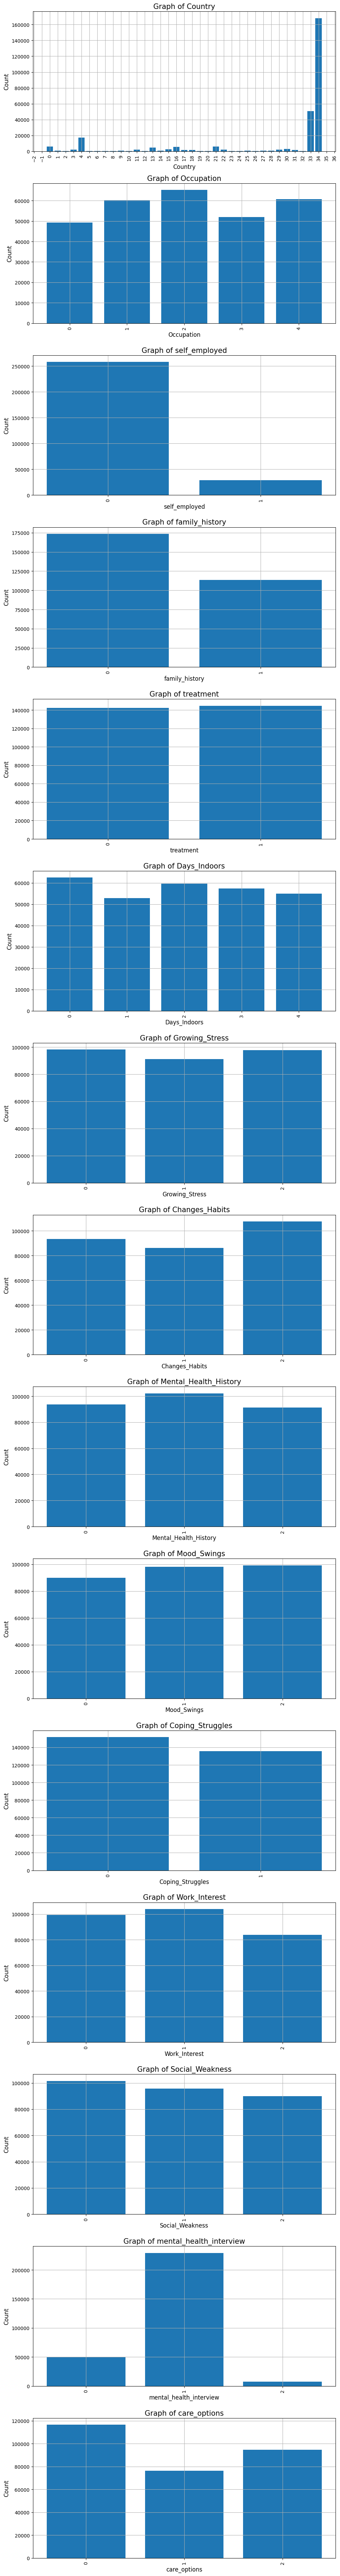

In [21]:
plt.figure(figsize=(10, 5 * (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    plt.subplot(len(df.columns) - 1, 1, i)
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Graph of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and horizontal alignment to center
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()
plt.show()

**<h3>f. Printing the column name followed by the unique values present in that column.<h1>**

In [22]:
for column in df:
  print(column)
  print(df[column].unique(), '\n')

Gender
[0 1] 

Country
[34 25  0  4 33 29 30 22 21 15  1 16 11 26  3  6 27 13 31 10 17 18  2 28
 23  7 32  9 19 14 20  5 12  8 24] 

Occupation
[1 4 0 2 3] 

self_employed
[0 1] 

family_history
[1 0] 

treatment
[1 0] 

Days_Indoors
[0 3 4 1 2] 

Growing_Stress
[2 1 0] 

Changes_Habits
[1 2 0] 

Mental_Health_History
[2 1 0] 

Mood_Swings
[2 1 0] 

Coping_Struggles
[0 1] 

Work_Interest
[1 0 2] 

Social_Weakness
[2 1 0] 

mental_health_interview
[0 1 2] 

care_options
[2 1 0] 



**<h1>Training the Decision Tree, GuassianNB, RandomForest ,KNN models with target variable as care_options and with the rest of the features**

In [24]:
# Define Features and Target
Features = ['Gender', 'self_employed', 'family_history', 'treatment',
            'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
            'Mental_Health_History', 'Coping_Struggles',
            'Work_Interest', 'Social_Weakness']
Target = 'care_options'

# Placeholder for model metrics
model_metrics = []

# Define a function to evaluate models
def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    model.fit(X_train, Y_train)
    result = model.predict(X_test)

    ac_sc = accuracy_score(Y_test, result)
    rc_sc = recall_score(Y_test, result, average="weighted")
    pr_sc = precision_score(Y_test, result, average="weighted")
    f1_sc = f1_score(Y_test, result, average='micro')
    confusion_m = confusion_matrix(Y_test, result)

    # Append metrics to list
    model_metrics.append((model_name, ac_sc, rc_sc, pr_sc, f1_sc))

    print(f"========== {model_name} ==========")
    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    print("Confusion Matrix: ")
    print(confusion_m)
    print("\n")

# Load your data
# Assuming 'df' is your dataframe and 'Features' and 'Target' are the columns you're using
X_train, X_test, Y_train, Y_test = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)

# Models to evaluate
models = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (GaussianNB(), "Gaussian Naive Bayes"),
    (RandomForestClassifier(), "Random Forest Classifier"),
    (KNeighborsClassifier(n_neighbors=1000), "KNN")
]

# Evaluate each model
for model, model_name in models:
    evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name)

# Determine and print the best model based on accuracy
best_model = max(model_metrics, key=lambda x: x[1])  # Based on accuracy score
print("========== Best Model ==========")
print(f"Best Model: {best_model[0]}")
print("Accuracy    : ", best_model[1])
print("Recall      : ", best_model[2])
print("Precision   : ", best_model[3])
print("F1 Score    : ", best_model[4])

========== Decision Tree ==========
Accuracy    :  0.4646109379624954
Recall      :  0.4646109379624954
Precision   :  0.45327183177221364
F1 Score    :  0.4646109379624954
Confusion Matrix: 
[[13161   962  9101]
 [ 8404  1100  5780]
 [ 5891   611 12423]]


========== Gaussian Naive Bayes ==========
Accuracy    :  0.4636358887747462
Recall      :  0.4636358887747462
Precision   :  0.46273338572036077
F1 Score    :  0.4636358887747462
Confusion Matrix: 
[[15513  1027  6684]
 [ 9327  1492  4465]
 [ 8576   726  9623]]


========== Random Forest Classifier ==========
Accuracy    :  0.4657775146692668
Recall      :  0.4657775146692668
Precision   :  0.45720230213814755
F1 Score    :  0.4657775146692668
Confusion Matrix: 
[[12973   925  9326]
 [ 8213  1139  5932]
 [ 5655   631 12639]]


========== KNN ==========
Accuracy    :  0.45466891856598124
Recall      :  0.45466891856598124
Precision   :  0.4730156725222095
F1 Score    :  0.45466891856598124
Confusion Matrix: 
[[17787    65  5372]
 [1

**<h1>MY OBSERVATIONS</h1>**
<h3>Without feature selection, By just training the Models normally,the Highest Accuracy I am getting is 46.49% using Decesion Tree.</h3>

**<h1>Feature Selection</h1>**
**<h2>Using Corelation Cofactor Heatmap</h2>**
**<h4>We have to select the features strongly correlated with the target variable care_options to improve prediction. It starts by separating the target and features, then calculates and visualizes the correlation matrix to understand relationships between variables. By taking the absolute values of correlations with care_options and filtering those above a threshold (0.01), it identifies and outputs features that are potentially useful for predicting care_options.</h4>**

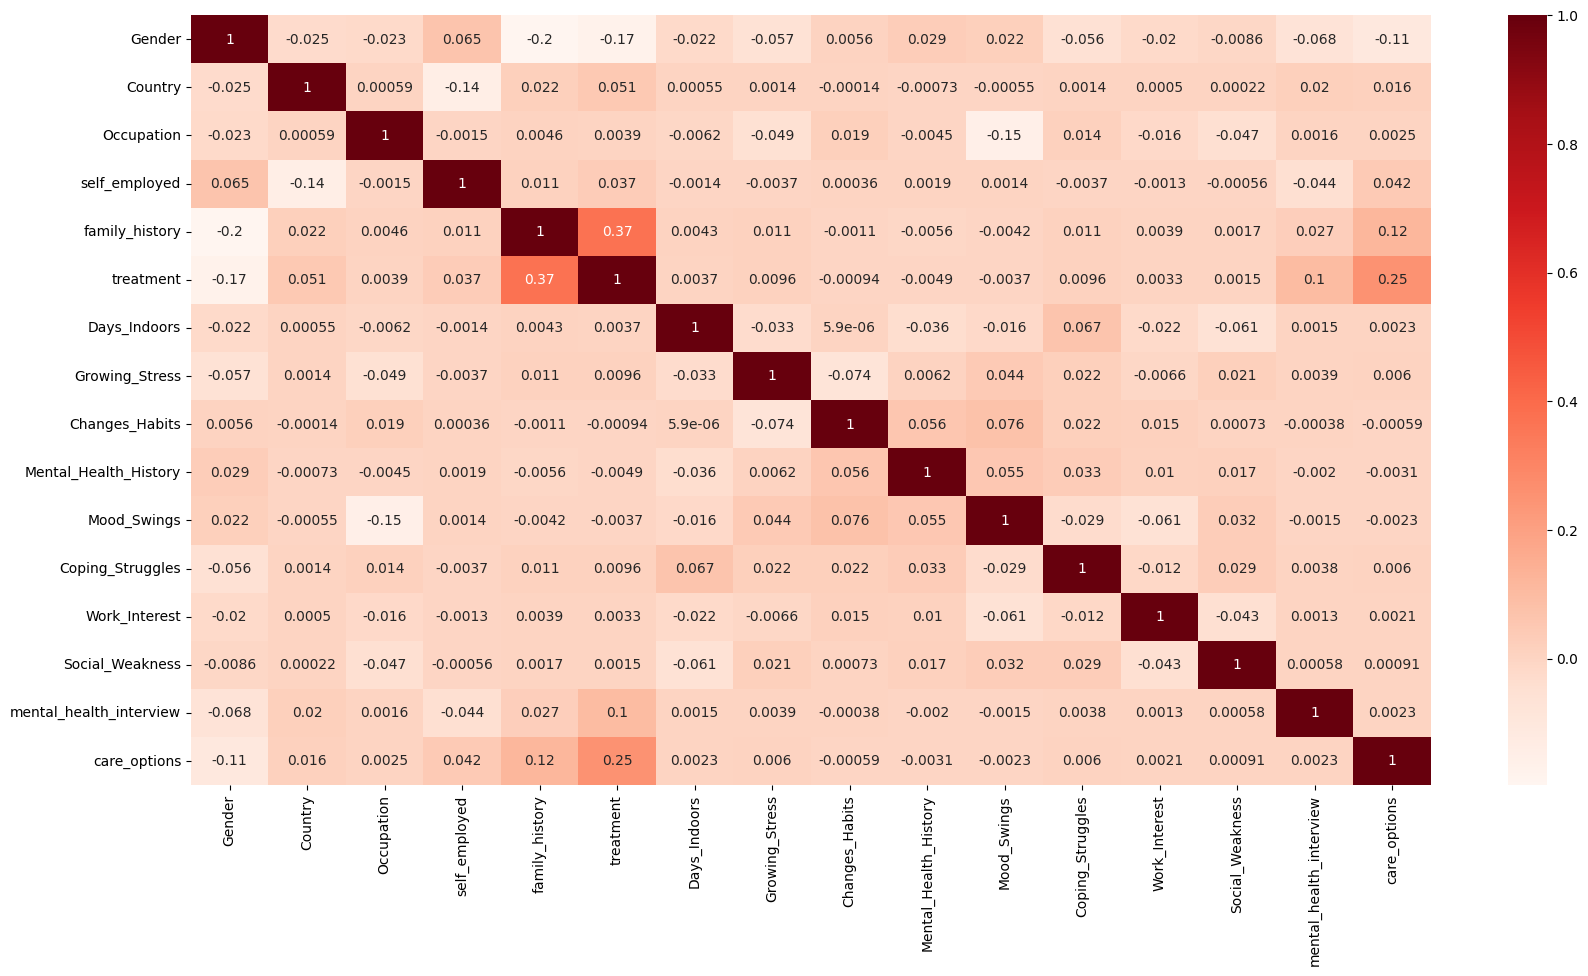

In [25]:
# Set target and features
X_fs = df.drop(['care_options'], axis=1)  # Drop the new target column
Y_fs = df['care_options']  # Set the target variable

# Visualize correlations with the updated target
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [26]:
# Calculate the absolute correlations with the new target variable
cor_target = abs(cor['care_options'])

# Selecting features highly correlated with 'care_options'
relevant_features = cor_target[cor_target > 0.01]
print(relevant_features)


Gender            0.106555
Country           0.016408
self_employed     0.041898
family_history    0.119625
treatment         0.252841
care_options      1.000000
Name: care_options, dtype: float64


**<h3>a. As we got very less Corelation between the target variable and all other features we are plotting the scatter plots**

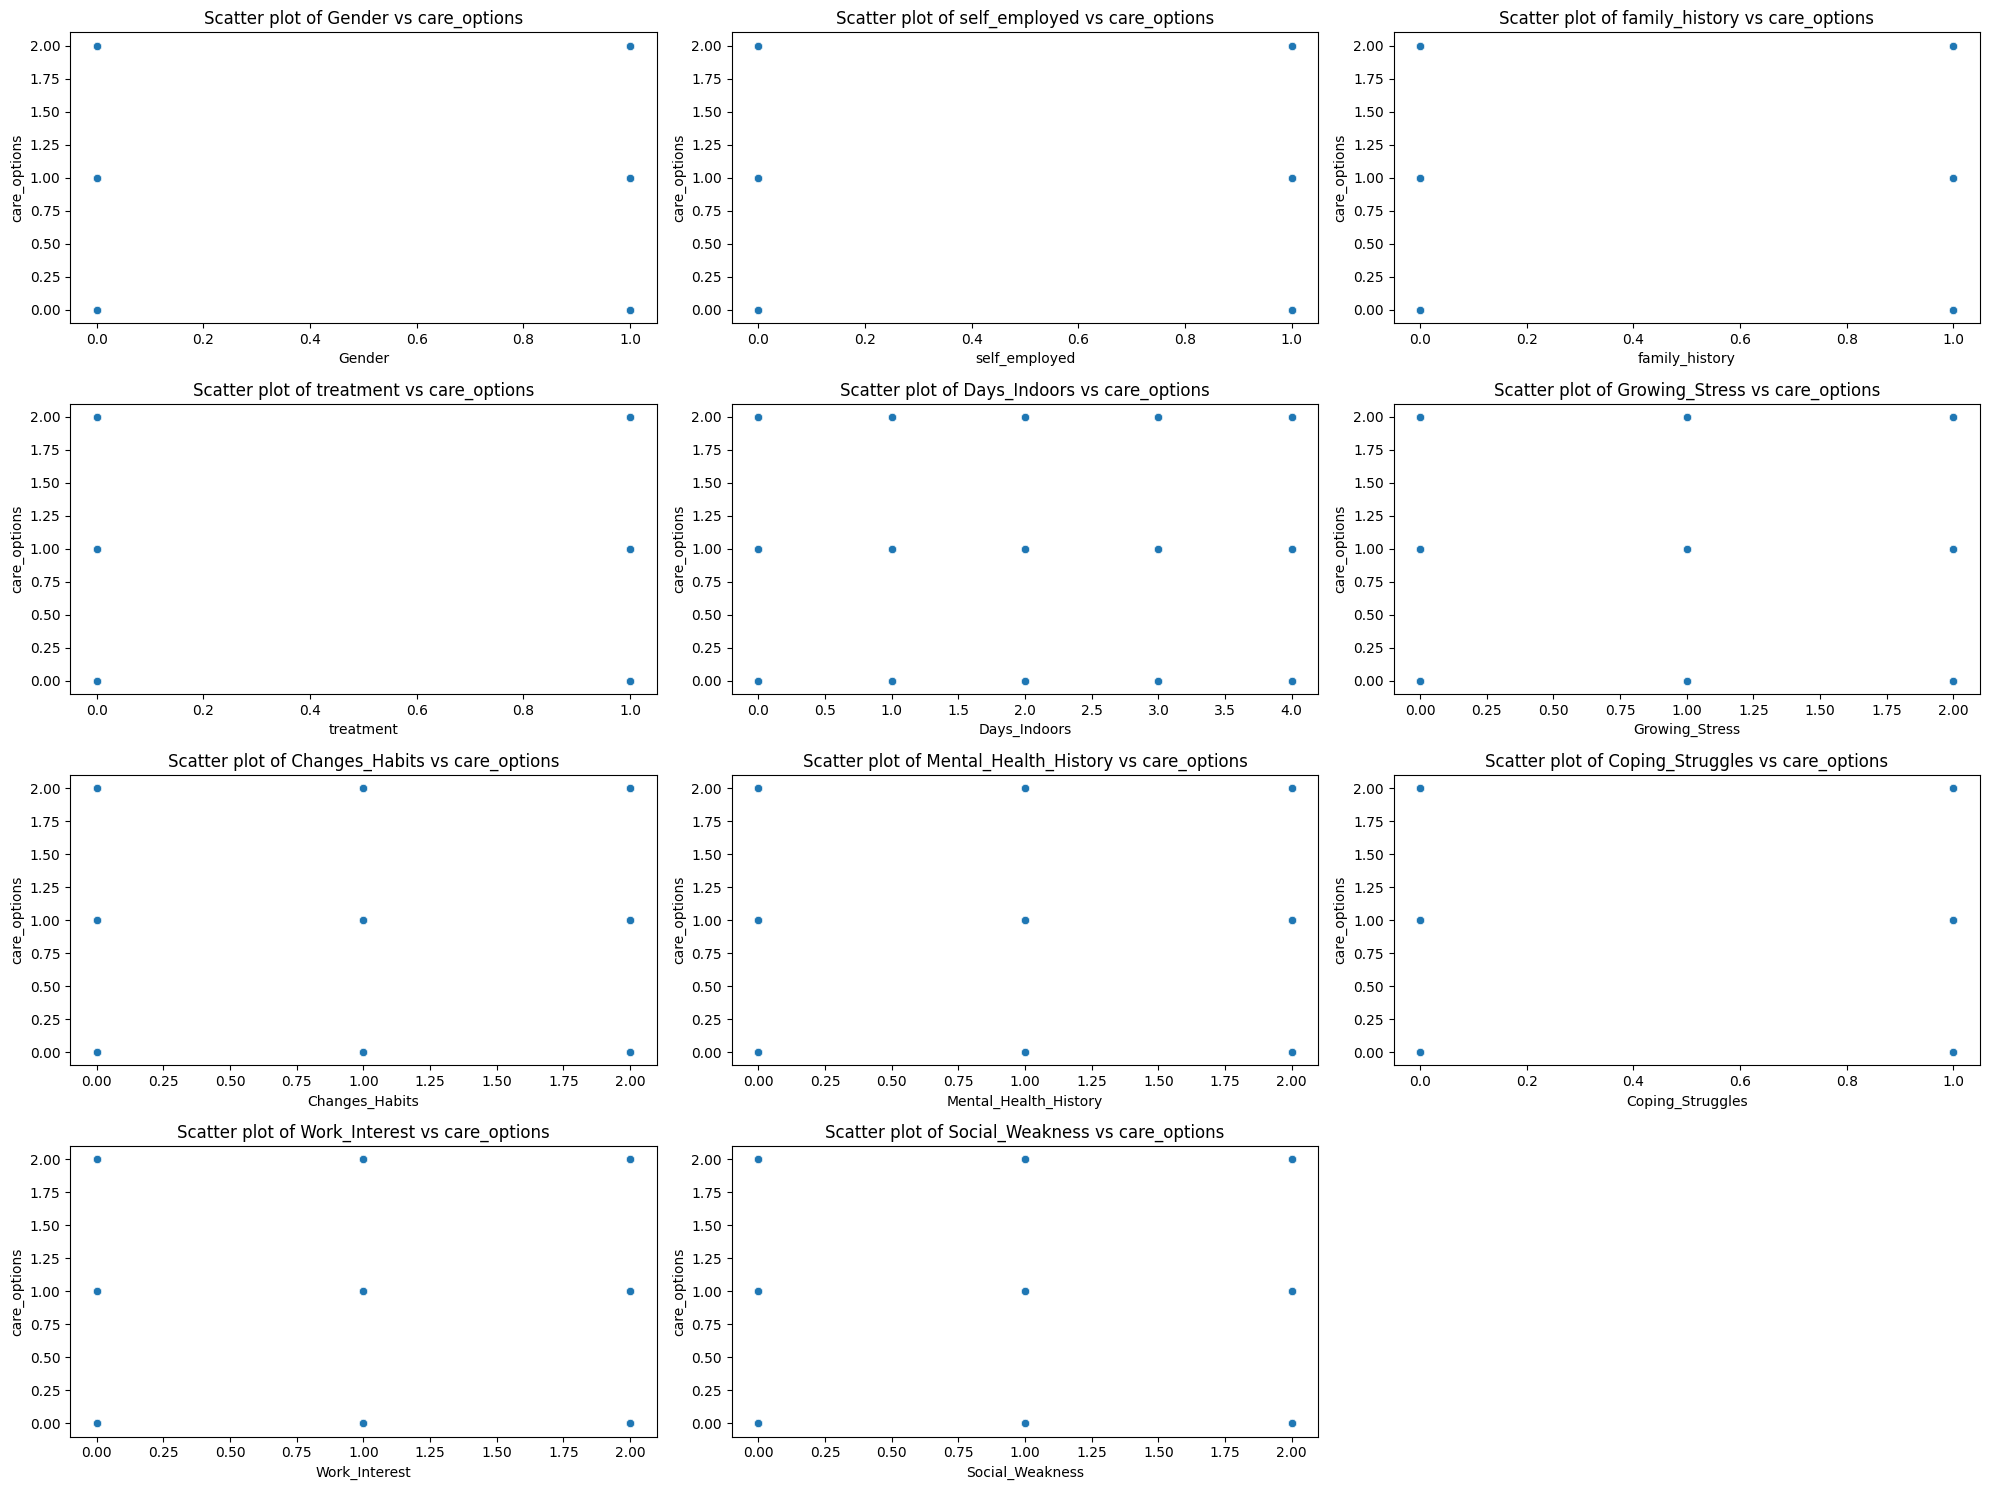

In [27]:
# List of features to plot against the target variable
features = ['Gender', 'self_employed', 'family_history', 'treatment',
            'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
            'Mental_Health_History', 'Coping_Struggles',
            'Work_Interest', 'Social_Weakness']

# Set up the matplotlib figure for multiple plots
plt.figure(figsize=(20, 15))

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Adjust subplot grid based on number of features
    sns.scatterplot(x=df[feature], y=df['care_options'])
    plt.xlabel(feature)
    plt.ylabel('care_options')
    plt.title(f'Scatter plot of {feature} vs care_options')

plt.tight_layout()
plt.show()

**Since we are dealing with Categorial Data the scatter plots are not much of a use , so we have to construct the class wise heatmap analysis**

---



**<h3>Class-wise Heatmap for Features and Target</h1>**

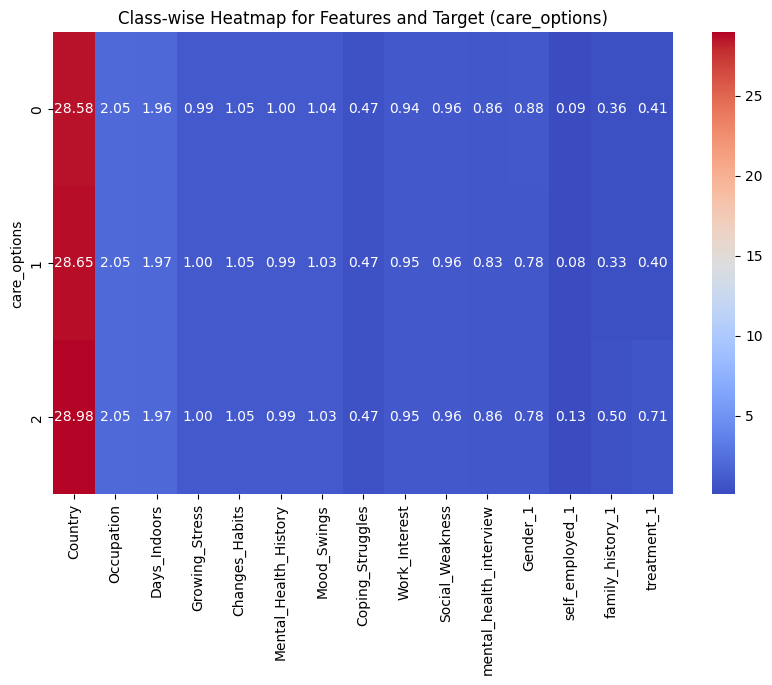

                    Feature  Mutual Information
0                   Country            0.093133
14              treatment_1            0.061202
11                 Gender_1            0.026273
10  mental_health_interview            0.021595
13         family_history_1            0.020849
7          Coping_Struggles            0.014021
4            Changes_Habits            0.009323
9           Social_Weakness            0.009120
3            Growing_Stress            0.009115
6               Mood_Swings            0.008610
5     Mental_Health_History            0.008290
8             Work_Interest            0.008255
2              Days_Indoors            0.005158
1                Occupation            0.004032
12          self_employed_1            0.002318


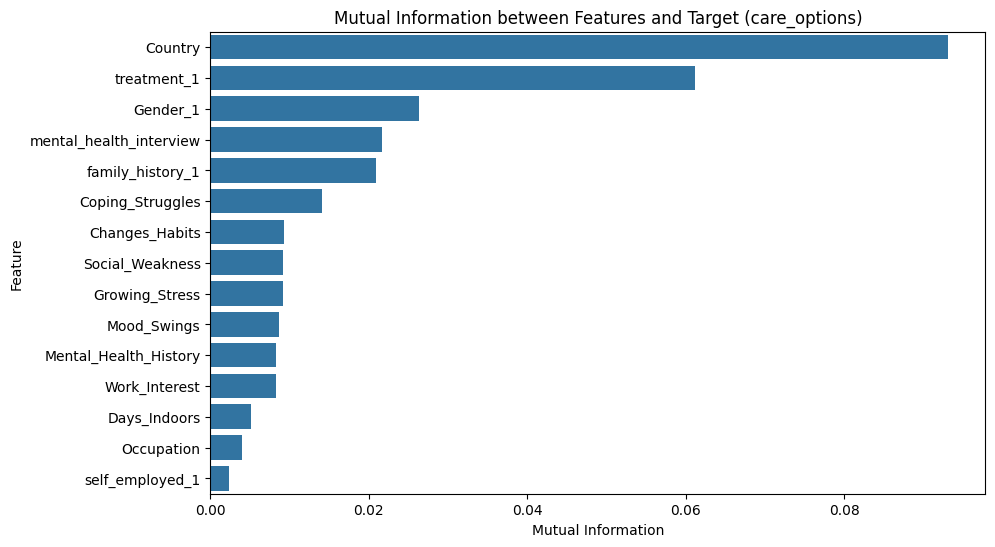

Selected Features based on Mutual Information: ['Country', 'treatment_1', 'Gender_1', 'mental_health_interview', 'family_history_1']


In [28]:
# Define target and feature columns
target = 'care_options'
categorical_features = ['Gender', 'self_employed', 'family_history', 'treatment']
numeric_features = ['Mental_Health_History', 'Days_Indoors', 'Growing_Stress',
                    'Changes_Habits', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

# Combine categorical and numeric features
features = categorical_features + numeric_features

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Check for missing values
df = df.dropna()  # Handle any missing data before proceeding

# Update the features list after one-hot encoding
updated_features = [col for col in df.columns if col != target]  # Exclude the target column

# Create a class-wise heatmap by grouping by target ('care_options') and calculating the mean of each feature
class_wise_df = df.groupby(target)[updated_features].mean()

# Plot the class-wise heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(class_wise_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Class-wise Heatmap for Features and Target (care_options)')
plt.show()

# Split data into features (X) and target (y)
X = df[updated_features]
y = df[target]

# Use mutual information to calculate feature importance
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to show the mutual information scores for each feature
mutual_info_df = pd.DataFrame({
    'Feature': updated_features,
    'Mutual Information': mutual_info
})

# Sort by mutual information score
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Print the mutual information scores
print(mutual_info_df)

# Visualize the mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mutual_info_df)
plt.title('Mutual Information between Features and Target (care_options)')
plt.show()

# Select features based on mutual information score
threshold = 0.02  # Adjust this threshold as needed
selected_features = mutual_info_df[mutual_info_df['Mutual Information'] >= threshold]['Feature'].tolist()

print("Selected Features based on Mutual Information:", selected_features)


**<h3>After the analysis of class-wise heatmap we have selected the best features based on Mutual Information now We are training the  Decision Tree, GuassianNB, RandomForest ,KNN models with target variable as care_options and with the rest of the selected features</h1>**

In [29]:
# Define Features and Target
Features = ['Country', 'treatment_1', 'Gender_1', 'family_history_1', 'mental_health_interview']
print('Full Features: ', Features)
Target = 'care_options'
print('Target: ', Target)

# Placeholder for model metrics
model_metrics = []

# Define a function to evaluate models
def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    model.fit(X_train, Y_train)
    result = model.predict(X_test)

    ac_sc = accuracy_score(Y_test, result)
    rc_sc = recall_score(Y_test, result, average="weighted")
    pr_sc = precision_score(Y_test, result, average="weighted")
    f1_sc = f1_score(Y_test, result, average='micro')
    confusion_m = confusion_matrix(Y_test, result)

    # Append metrics to list
    model_metrics.append((model_name, ac_sc, rc_sc, pr_sc, f1_sc))

    print(f"========== {model_name} ==========")
    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    print("Confusion Matrix: ")
    print(confusion_m)
    print("\n")

# Load your data
# Assuming 'df' is your dataframe and 'Features' and 'Target' are the columns you're using
X_train, X_test, Y_train, Y_test = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)

# Models to evaluate
models = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (GaussianNB(), "Gaussian Naive Bayes"),
    (RandomForestClassifier(), "Random Forest Classifier"),
    (KNeighborsClassifier(n_neighbors=1000), "KNN")
]

# Evaluate each model
for model, model_name in models:
    evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name)

# Determine and print the best model based on accuracy
best_model = max(model_metrics, key=lambda x: x[1])  # Based on accuracy score
print("========== Best Model ==========")
print(f"Best Model: {best_model[0]}")
print("Accuracy    : ", best_model[1])
print("Recall      : ", best_model[2])
print("Precision   : ", best_model[3])
print("F1 Score    : ", best_model[4])


Full Features:  ['Country', 'treatment_1', 'Gender_1', 'family_history_1', 'mental_health_interview']
Target:  care_options
========== Decision Tree ==========
Accuracy    :  0.5937527205613498
Recall      :  0.5937527205613498
Precision   :  0.5949295027960118
F1 Score    :  0.5937527205613498
Confusion Matrix: 
[[15440  2355  5429]
 [ 5475  5797  4012]
 [ 4559  1502 12864]]


========== Gaussian Naive Bayes ==========
Accuracy    :  0.4790625598523497
Recall      :  0.4790625598523497
Precision   :  0.4759976471383984
F1 Score    :  0.4790625598523497
Confusion Matrix: 
[[15464  1260  6500]
 [ 8846  1796  4642]
 [ 7864   807 10254]]


========== Random Forest Classifier ==========
Accuracy    :  0.5938397785245416
Recall      :  0.5938397785245416
Precision   :  0.5951453735792934
F1 Score    :  0.5938397785245416
Confusion Matrix: 
[[15208  2437  5579]
 [ 5312  5879  4093]
 [ 4404  1502 13019]]


========== KNN ==========
Accuracy    :  0.5646753608552574
Recall      :  0.5646753608

**<h3>b. To Get better results I am reducing my Features using LDA mainly to handle the categorical data and after reducing the dimension it trains the  Decision Tree, GuassianNB, RandomForest ,KNN models with target variable as care_options and with the rest of the selected features</h1>**

In [30]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume 'df' is your DataFrame with the features and target column
# Define features and target variable
X = df.drop(['care_options'], axis=1)  # Exclude target column from features
y = df['care_options']  # Define the target variable

# Convert all columns to numeric, handling non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)  # Fill any missing values with column means

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Check the number of classes and determine the maximum number of components for LDA
num_classes = len(y_train.unique())
num_features = X_train.shape[1]
max_components = min(num_classes - 1, num_features)  # LDA's `n_components` limit

# Define parameter grid for GridSearchCV with the maximum number of components
param_grid = {'n_components': list(range(1, max_components + 1))}

# Step 2: Set up GridSearchCV to find the optimal number of components
lda = LDA()
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# Retrieve the best LDA model and number of components
best_lda = grid_search.best_estimator_
best_n_components = grid_search.best_params_['n_components']

# Step 3: Transform the training and test data using the optimized LDA model
X_train_lda = best_lda.transform(X_train)
X_test_lda = best_lda.transform(X_test)

# Define classifiers to train and evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Step 4: Train, evaluate each classifier, and store metrics
model_metrics = []

for model_name, model in classifiers.items():
    # Train the model
    model.fit(X_train_lda, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_lda)

    # Calculate evaluation metrics
    ac_sc = accuracy_score(y_test, y_pred)
    rc_sc = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    pr_sc = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_sc = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Append metrics to the model_metrics list
    model_metrics.append((model_name, ac_sc, rc_sc, pr_sc, f1_sc))

    # Display evaluation metrics for each model
    print(f"\n========== {model_name} ==========")
    print(f"Accuracy    : {ac_sc:.4f}")
    print(f"Recall      : {rc_sc:.4f}")
    print(f"Precision   : {pr_sc:.4f}")
    print(f"F1 Score    : {f1_sc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("=" * 50)

# Identify the best model based on accuracy score
best_model = max(model_metrics, key=lambda x: x[1])  # Based on accuracy score

# Display best model's metrics
print("\n========== Best Model ==========")
print(f"Best Model: {best_model[0]}")
print("Accuracy    : ", best_model[1])
print("Recall      : ", best_model[2])
print("Precision   : ", best_model[3])
print("F1 Score    : ", best_model[4])



========== Logistic Regression ==========
Accuracy    : 0.4734
Recall      : 0.4734
Precision   : 0.3482
F1 Score    : 0.4000
Confusion Matrix:
 [[13764     0  9460]
 [ 9228     0  6056]
 [ 5503     0 13422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.59      0.53     23224
           1       0.00      0.00      0.00     15284
           2       0.46      0.71      0.56     18925

    accuracy                           0.47     57433
   macro avg       0.32      0.43      0.36     57433
weighted avg       0.35      0.47      0.40     57433


========== Decision Tree ==========
Accuracy    : 0.5064
Recall      : 0.5064
Precision   : 0.4966
F1 Score    : 0.4949
Confusion Matrix:
 [[13821  3124  6279]
 [ 6999  4046  4239]
 [ 5340  2367 11218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.60      0.56     23224
           1       0.42      0.26      0.33   

**<h1>Conclusion<h1>**
**<h3>Finally after three methods I have found that Decision Tree with Class-wise Heatmap analysis features have the best Accuracy of 59.23%.**

**<h3>Now I am Training the entire Dataset with Decesion tree to build the actual model and predict output for the data that i have collected using Google forms.**

In [ ]:
# Define Features and Target for training
Features = ['Country', 'treatment_1', 'Gender_1', 'family_history_1', 'mental_health_interview']
print('Training Features: ', Features)
Target = 'care_options'
print('Target: ', Target)

# Train the Decision Tree model on the selected features
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(df[Features], df[Target])

# Function to predict if the user needs care based on input
def predict_care():
    print("\nPlease provide the following details for the prediction:")

    # Collecting all inputs from the user
    user_data = {
        'Gender': input("Gender (1 for Male, 0 for Female): "),
        'Country': input("Country (0 for Australia, ....,15 for India,....., 34 for USA ): "),
        'Occupation': input("Occupation  4 for Student, 1 for coroporate, 2 for Housewife, 0 Business and 3 for others etc.): "),
        'self_employed': input("Self Employed (1 for Yes, 0 for No): "),
        'family_history': input("Family History (1 for Yes, 0 for No): "),
        'treatment': input("Treatment (1 for Yes, 0 for No): "),
        'Days_Indoors': input("Days Indoors 0 for (1-14 days), 1 for (15-30 days), 2 for (31-60 days), 3 for Go out everday and 4 for more than two months: "),
        'Growing_Stress': input("Growing Stress (2 for Yes, 0 for No and 1 for Maybe): "),
        'Changes_Habits': input("Changes in Habits (2 for Yes, 0 for No and 1 for Maybe): "),
        'Mental_Health_History': input("Mental Health History (2 for Yes, 0 for No and 1 for Maybe): "),
        'Mood_Swings': input("Mood Swings (2 for low,1 for Medium, 0 for high): "),
        'Coping_Struggles': input("Coping Struggles (1 for Yes, 0 for No): "),
        'Work_Interest': input("Work Interest (2 for Yes, 0 for No and 1 for Maybe): "),
        'Social_Weakness': input("Social Weakness (2 for Yes, 0 for No and 1 for Maybe): "),
        'mental_health_interview': input("Mental Health Interview (2 for Yes, 0 for No and 1 for Maybe): ")
    }

    # Extract only the required features for prediction
    user_input = pd.DataFrame([[
        user_data['Country'], user_data['treatment'], user_data['Gender'],
        user_data['family_history'], user_data['mental_health_interview']
    ]], columns=Features)

    # Make prediction using the trained model
    prediction = decision_tree_model.predict(user_input)

    # Print the prediction result
    if prediction[0] == 2:
        print("\nThe model predicts that you need care.")
    elif prediction[0] == 0:
        print("\nThe model predicts that you do not need care.")
    elif prediction[0] == 1:
        print("\nThe model predicts not sure that you need care.")

# Ask the user for input and predict
predict_care()


Training Features:  ['Country', 'treatment_1', 'Gender_1', 'family_history_1', 'mental_health_interview']
Target:  care_options

Please provide the following details for the prediction:
Gender (1 for Male, 0 for Female): 1
Country (0 for Australia, ....,15 for India,....., 34 for USA ): 15
Occupation  4 for Student, 1 for coroporate, 2 for Housewife, 0 Business and 3 for others etc.): 4
Self Employed (1 for Yes, 0 for No): 0
Family History (1 for Yes, 0 for No): 1
Treatment (1 for Yes, 0 for No): 0
Days Indoors 0 for (1-14 days), 1 for (15-30 days), 2 for (31-60 days), 3 for Go out everday and 4 for more than two months: 2
Growing Stress (2 for Yes, 0 for No and 1 for Maybe): 2
Changes in Habits (2 for Yes, 0 for No and 1 for Maybe): 0
Mental Health History (2 for Yes, 0 for No and 1 for Maybe): 0
Mood Swings (2 for low,1 for Medium, 0 for high): 1
Coping Struggles (1 for Yes, 0 for No): 0
Work Interest (2 for Yes, 0 for No and 1 for Maybe): 0
